In [98]:
import numpy as np
from sklearn import model_selection as sms
import matplotlib.pyplot as plt
np.random.seed(2018)
n = 100
xtrain = np.random.rand(n)
ytrain = 0.25 + 0.5*xtrain + np.sqrt(0.1)*np.random.randn(n)
idx = np.random.randint(0,100,10)
ytrain[idx] = ytrain[idx] + np.random.randn(10)

X_train, X_val, y_train, y_val = sms.train_test_split(xtrain, ytrain, test_size=0.33, random_state=76)

X_train = X_train.reshape(-1,1) # as specified in the question
X_val = X_val.reshape(-1,1)
xtrain = xtrain.reshape(-1,1)

yb = np.mean(ytrain) # to calculate the intercept from the slope
xb = np.mean(xtrain)

In [99]:
# Ridge regression (lambda hyper parameter)
print("Validation scores are as follows: ")
lamset = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000])
for k in range(0,10):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train),X_train) + np.sqrt(lamset[k])),np.transpose(X_train)),y_train)
    y_pred = np.dot(X_val, theta)
    MSE = ((np.linalg.norm(y_val - y_pred))**2)/len(y_pred)
    print("MSE for linear regression using lambda = ", lamset[k], "is: ",  MSE)
print("The best lambda: ", 0.001)
theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xtrain),xtrain) + 0.001),np.transpose(xtrain)),ytrain)
print("Using Ridge regression, The slope is: ", theta[0])
print("The intercept is: " ,yb - (xb*theta[0]))

Validation scores are as follows: 
MSE for linear regression using lambda =  0.0001 is:  0.127828226975
MSE for linear regression using lambda =  0.001 is:  0.127951690132
MSE for linear regression using lambda =  0.01 is:  0.128343418317
MSE for linear regression using lambda =  0.1 is:  0.129594639714
MSE for linear regression using lambda =  1.0 is:  0.133659408019
MSE for linear regression using lambda =  10.0 is:  0.147174012969
MSE for linear regression using lambda =  100.0 is:  0.189541493075
MSE for linear regression using lambda =  1000.0 is:  0.282489161873
MSE for linear regression using lambda =  10000.0 is:  0.387152580671
MSE for linear regression using lambda =  1000000.0 is:  0.474180874069
The best lambda:  0.001
Using Ridge regression, The slope is:  0.853749441218
The intercept is:  0.0647156277696


In [100]:
# Using Huber loss (epsilon and alpha hyperparameters)
from sklearn import linear_model
X_train, X_val, y_train, y_val = sms.train_test_split(xtrain, ytrain, test_size=0.33, random_state=76)
eps = np.array([1.1, 1.2, 1.25, 1.50, 1.75, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8])
alp = np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
print("Validation scores are as follows: ")
for k in range(0,8):
    for j in range(0,10): 
        reg = linear_model.HuberRegressor(epsilon = eps[k], alpha=alp[j])
        reg.fit(X_train,y_train)
        scoree = reg.score(X_val, y_val)
        print("The score: ", reg.score(X_val, y_val), "for epsilon = ", eps[k], "alpha = ", alp[j])

Validation scores are as follows: 
The score:  0.221910197789 for epsilon =  1.1 alpha =  1e-07
The score:  0.221910187828 for epsilon =  1.1 alpha =  1e-06
The score:  0.221910088223 for epsilon =  1.1 alpha =  1e-05
The score:  0.221909092174 for epsilon =  1.1 alpha =  0.0001
The score:  0.221899132114 for epsilon =  1.1 alpha =  0.001
The score:  0.221799577684 for epsilon =  1.1 alpha =  0.01
The score:  0.220808227008 for epsilon =  1.1 alpha =  0.1
The score:  0.209730233272 for epsilon =  1.1 alpha =  1.0
The score:  0.13707129075 for epsilon =  1.1 alpha =  10.0
The score:  0.0044014790649 for epsilon =  1.1 alpha =  100.0
The score:  0.230401577375 for epsilon =  1.2 alpha =  1e-07
The score:  0.230401567694 for epsilon =  1.2 alpha =  1e-06
The score:  0.230401470882 for epsilon =  1.2 alpha =  1e-05
The score:  0.230400502763 for epsilon =  1.2 alpha =  0.0001
The score:  0.230390822053 for epsilon =  1.2 alpha =  0.001
The score:  0.230294062998 for epsilon =  1.2 alpha = 

In [101]:
# Best alpha = 10-7 and epsilon = 1.25 
reg2 = linear_model.HuberRegressor(epsilon = 1.25, alpha=0.0000001)
reg2.fit(xtrain,ytrain)
print("Using Huber loss, Slope: ", reg2.coef_[0], "and Intercept: ", reg2.intercept_, "for the best model")

Using Huber loss, Slope:  0.523816794135 and Intercept:  0.24089946044 for the best model


In [102]:
# Using SVR
from sklearn.svm import SVR
X_train, X_val, y_train, y_val = sms.train_test_split(xtrain, ytrain, test_size=0.33, random_state=76)
eps = np.array([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 10, 100])
C = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
print("Validation scores are as follows: ")
for k in range(0,8):
    for j in range(0,8): 
        reg = SVR(C=C[k], epsilon=eps[j],kernel = 'linear')
        reg.fit(X_train,y_train)
        print("The score: ", reg.score(X_val, y_val), "for epsilon = ", eps[k], "C = ", C[j])

Validation scores are as follows: 
The score:  -0.0415796481774 for epsilon =  0.001 C =  1e-06
The score:  -0.0399196232595 for epsilon =  0.001 C =  1e-05
The score:  -0.0550491997889 for epsilon =  0.001 C =  0.0001
The score:  -0.0625412517522 for epsilon =  0.001 C =  0.001
The score:  -0.106242784192 for epsilon =  0.001 C =  0.01
The score:  -0.0628162683496 for epsilon =  0.001 C =  0.1
The score:  -0.129822508637 for epsilon =  0.001 C =  1.0
The score:  -0.0223067212647 for epsilon =  0.001 C =  10.0
The score:  -0.0415384229249 for epsilon =  0.01 C =  1e-06
The score:  -0.0398905041085 for epsilon =  0.01 C =  1e-05
The score:  -0.0549946464896 for epsilon =  0.01 C =  0.0001
The score:  -0.0625061197774 for epsilon =  0.01 C =  0.001
The score:  -0.106202057799 for epsilon =  0.01 C =  0.01
The score:  -0.0627955221743 for epsilon =  0.01 C =  0.1
The score:  -0.129821770798 for epsilon =  0.01 C =  1.0
The score:  -0.0223082536815 for epsilon =  0.01 C =  10.0
The score: 

In [103]:
# Best epsilon = 1 and C = 0.001
reg3 = SVR(C=0.001, epsilon=1, kernel='linear')
reg3.fit(xtrain,ytrain)
print("The slope using SVR: ", reg3.coef_[0])
print("The intercept using SVR: ", reg3.intercept_[0])

The slope using SVR:  [-0.0002004]
The intercept using SVR:  0.51277886889


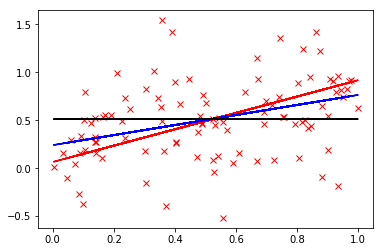

In [104]:
plt.figure()
plt.plot(xtrain, ytrain, 'rx') # scatter plot of all the data points 
plt.plot(xtrain, xtrain*theta[0] + inter1, 'r') # ridge regression line (red)
plt.plot(xtrain, xtrain*reg2.coef_[0] + reg2.intercept_, 'b') # Huber loss line (blue)
plt.plot(xtrain, xtrain*reg3.coef_[0] + reg3.intercept_, 'k') # SVR line (black)
plt.show()